In [1]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
import numpy as np

# Hyper parameters
batch_size = 128
nb_epoch = 100

# Parameters for MNIST dataset
img_rows, img_cols = 28, 28

# Parameters for denoising autoencoder
nb_visible = img_rows * img_cols
nb_hidden = 500
corruption_level = 0.3

Using TensorFlow backend.


In [2]:
# Load MNIST Dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [3]:
# Add random noise
x_train_noisy = x_train + corruption_level * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + corruption_level * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
print(x_train_noisy.shape)
print(x_test_noisy.shape)

(60000, 784)
(10000, 784)


In [4]:
# Build autoencoder model
input_img = Input(shape=(nb_visible,))
encoded = Dense(nb_hidden, activation='relu')(input_img)
decoded = Dense(nb_visible, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_img, outputs=decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_2 (Dense)              (None, 784)               392784    
Total params: 785,284
Trainable params: 785,284
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Train
autoencoder.fit(x_train_noisy, x_train,
                epochs=nb_epoch, batch_size=batch_size, shuffle=True, verbose=1,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 22s 362us/step - loss: 0.2735 - val_loss: 0.2259
Epoch 2/100
60000/60000 [==============================] - 21s 352us/step - loss: 0.2040 - val_loss: 0.1844
Epoch 3/100
60000/60000 [==============================] - 22s 360us/step - loss: 0.1743 - val_loss: 0.1631
Epoch 4/100
60000/60000 [==============================] - 21s 358us/step - loss: 0.1570 - val_loss: 0.1488
Epoch 5/100
60000/60000 [==============================] - 22s 370us/step - loss: 0.1449 - val_loss: 0.1384
Epoch 6/100
60000/60000 [==============================] - 22s 365us/step - loss: 0.1359 - val_loss: 0.1306
Epoch 7/100
60000/60000 [==============================] - 21s 357us/step - loss: 0.1290 - val_loss: 0.1246
Epoch 8/100
60000/60000 [==============================] - 22s 364us/step - loss: 0.1237 - val_loss: 0.1199
Epoch 9/100
60000/60000 [==============================] - 21s 358us/step - loss: 0.11

In [6]:
# Evaluate
evaluation = autoencoder.evaluate(x_test_noisy, x_test, batch_size=batch_size, verbose=1)
print('\nSummary: Loss over the test dataset: %.2f' % (evaluation))

10000/10000 [==============================] - 1s 78us/step

Summary: Loss over the test dataset: 0.08


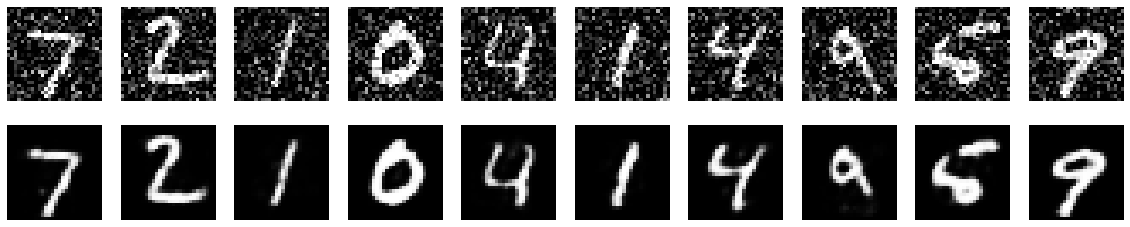

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# Decode test images 
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()